In [2]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [5]:
tensorflow.test.is_gpu_available()

True

In [6]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading the dataset

In [7]:
labels = os.listdir("../input/drowsiness-dataset/train")
labels

['Closed', 'Open', 'yawn', 'no_yawn']

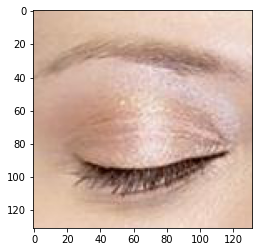

In [8]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [9]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")
print("Shape of a is : {} , and value of 1st vector in a is : {} ".format(a.shape,a[:1]))

Shape of a is : (480, 640, 3) , and value of 1st vector in a is : [[[ 65  60  54]
  [ 65  60  54]
  [ 65  60  54]
  ...
  [254 254 254]
  [255 255 255]
  [255 255 255]]] 


 Fatigued image 


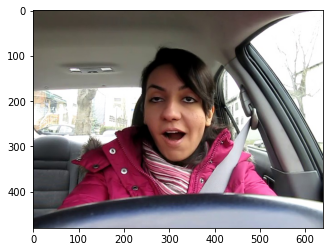

In [10]:
print(" Fatigued image ")
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/5.jpg"))

In [37]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [47]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [48]:
validation_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


# Rescaling the image

In [49]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [50]:
test_data = test_data_gen.flow_from_directory("../input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [94]:
train_data[1]

(array([[[[0.6666667 , 0.5372549 , 0.3372549 ],
          [0.72156864, 0.6       , 0.41960788],
          [0.69803923, 0.5764706 , 0.4039216 ],
          ...,
          [0.9490197 , 0.8431373 , 0.7686275 ],
          [0.9450981 , 0.8470589 , 0.7686275 ],
          [0.9450981 , 0.8588236 , 0.77647066]],
 
         [[0.6509804 , 0.5176471 , 0.32941177],
          [0.76470596, 0.63529414, 0.45882356],
          [0.8117648 , 0.6901961 , 0.5176471 ],
          ...,
          [0.9490197 , 0.8352942 , 0.76470596],
          [0.94117653, 0.8352942 , 0.7607844 ],
          [0.9450981 , 0.8470589 , 0.7686275 ]],
 
         [[0.7294118 , 0.6039216 , 0.41960788],
          [0.7411765 , 0.6117647 , 0.43529415],
          [0.6392157 , 0.5176471 , 0.34509805],
          ...,
          [0.9450981 , 0.8235295 , 0.75294125],
          [0.94117653, 0.82745105, 0.7568628 ],
          [0.9490197 , 0.8431373 , 0.7686275 ]],
 
         ...,
 
         [[0.882353  , 0.7411765 , 0.60784316],
          [0.87843

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

## VGG16

In [81]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Flatten
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
def createModel():
    _input = Input(shape=(80,80,3))

    conv1  = Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")(_input)
    conv2  = Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu")(conv1)
    pool1  = MaxPooling2D((2, 2))(conv2)
    

    conv3  = SeparableConv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(pool1)
    conv4  = SeparableConv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu")(conv3)
    conv4  = BatchNormalization()(conv4)
    pool2  = MaxPooling2D((2, 2))(conv4)

    conv5  = SeparableConv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(pool2)
    conv6  = SeparableConv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv5)
    conv6  = BatchNormalization()(conv6)
    pool3  = MaxPooling2D((2, 2))(conv6)

    conv7  = SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool3)
    conv8  = SeparableConv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv7)
    conv8 = BatchNormalization()(conv8)
    pool4  = MaxPooling2D((2, 2))(conv8)
    pool4 = Dropout(rate=0.2)(pool4)
    
    conv9 = SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool4)
    conv10 = SeparableConv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv9)
    conv10 = BatchNormalization()(conv10)
    pool5  = MaxPooling2D((2, 2))(conv10)
    pool5 = Dropout(rate=0.2)(pool5)

    flat   = Flatten()(pool5)
    dense1 = Dense(512, activation="relu")(flat)   
    dropout1 = Dropout(rate=0.7)(dense1)
    dense2 = Dense(128, activation="relu")(dropout1)
    dropout2 = Dropout(0.5)(dense2)
    output = Dense(4, activation="sigmoid")(dropout2)
    model  = Model(inputs=_input, outputs=output)
    model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])
    
    return model


In [82]:
modelFitLRate = createModel()
epochs = 25
modelFitLRate.summary()
history = modelFitLRate.fit(train_data, epochs=25, validation_data = test_data, shuffle=True, validation_steps = 91)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 80, 80, 16)        448       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 80, 80, 16)        2320      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 40, 40, 16)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 40, 40, 32)        688       
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 40, 40, 32)        1344      
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 40, 32)        128   

[INFO] evaluating network...


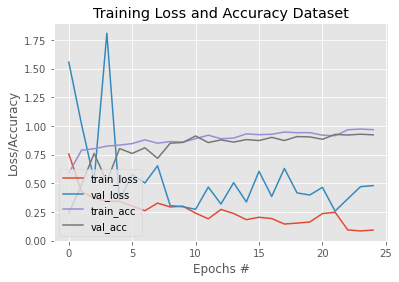

In [84]:
def showChartEpochAccuracy(history):
    # show a nicely formatted classification report
    print("[INFO] evaluating network...")
    # plot the training loss and accuracy
    N = 25
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy Dataset")
    plt.xlabel("Epochs #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.show()

showChartEpochAccuracy(history)

# VGG19

In [88]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
sd=[]
class LossHistory(tensorflow.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = [1,1]

    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        sd.append(step_decay(len(self.losses)))
        print('lr:', step_decay(len(self.losses)))

epochs = 20
learning_rate = 0.001
decay_rate = 5e-6

model = createModel()

adam = Adam(lr=learning_rate,decay=decay_rate)
sgd = SGD(lr=0.0001, momentum=0.9, decay=decay_rate)
model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mean_absolute_error','accuracy'])

def step_decay(losses):
    i = float(2*np.sqrt(np.array(history.losses[-1])))

    if i <0.6:
        lrate=0.001*1/(1+0.7*len(history.losses))
        decay_rate=2e-6
    else:
        lrate =0.0001
   
    return lrate
history=LossHistory()
lrate=LearningRateScheduler(step_decay)

myhistory = model.fit(train_data,validation_data=test_data,validation_steps=
                      91,batch_size=8, 
                      epochs=epochs,callbacks=[history,lrate], verbose=1)

Epoch 1/20
291/291 [==============================] - 16s 52ms/step - loss: 0.1783 - mean_absolute_error: 0.3696 - accuracy: 0.4313 - val_loss: 0.2167 - val_mean_absolute_error: 0.4529 - val_accuracy: 0.2239
lr: 0.0001
Epoch 2/20
291/291 [==============================] - 16s 56ms/step - loss: 0.1257 - mean_absolute_error: 0.2647 - accuracy: 0.6256 - val_loss: 0.2157 - val_mean_absolute_error: 0.4089 - val_accuracy: 0.3049
lr: 0.0001
Epoch 3/20
291/291 [==============================] - 15s 51ms/step - loss: 0.0945 - mean_absolute_error: 0.2031 - accuracy: 0.7355 - val_loss: 0.0769 - val_mean_absolute_error: 0.1647 - val_accuracy: 0.7802
lr: 0.0001
Epoch 4/20
291/291 [==============================] - 15s 50ms/step - loss: 0.0729 - mean_absolute_error: 0.1565 - accuracy: 0.7945 - val_loss: 0.0609 - val_mean_absolute_error: 0.1259 - val_accuracy: 0.8091
lr: 0.00019230769230769233
Epoch 5/20
291/291 [==============================] - 14s 49ms/step - loss: 0.0673 - mean_absolute_error: 0.

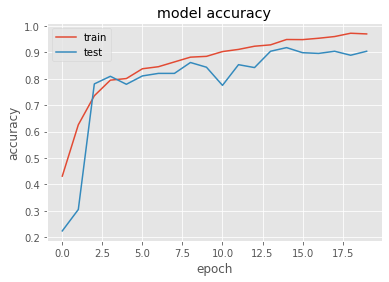

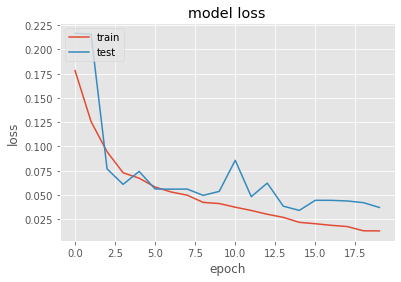

In [89]:
plt.plot(myhistory.history['accuracy'])
plt.plot(myhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Test and evaluate

In [98]:
test_data

In [91]:
# Get predictions
mypredict = model.predict(test_data)
pred = np.argmax(mypredict, axis=-1)
print(pred)

[0 0 2 ... 2 3 0]


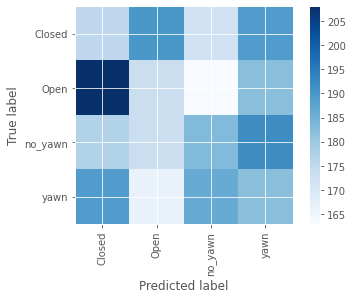

In [99]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get the model predictions for the test data
y_pred = np.argmax(modelFitLRate.predict(test_data), axis=1)

# Get the true labels for the test data
y_true = test_data.classes

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add axis labels and tick marks
tick_marks = np.arange(len(test_data.class_indices))
plt.xticks(tick_marks, test_data.class_indices, rotation=90)
plt.yticks(tick_marks, test_data.class_indices)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [101]:
test_loss, test_acc = modelFitLRate.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


363/363 [==============================] - 14s 39ms/step - loss: 0.5183 - accuracy: 0.9121
Test loss: 0.5182976722717285
Test accuracy: 0.9120689630508423


# Custom CNN Model

In [57]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [58]:
model.build(input_shape=(80, 80, 3))

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 6, 6, 32)         

In [60]:
validation_steps = len(test_data)
validation_steps

363

In [70]:
hist = model.fit(train_data, epochs=25, validation_data = test_data, shuffle=True, validation_steps = 91)

Epoch 1/25
291/291 [==============================] - 18s 63ms/step - loss: 0.0407 - accuracy: 0.9849 - val_loss: 0.2317 - val_accuracy: 0.9574
Epoch 2/25
291/291 [==============================] - 15s 53ms/step - loss: 0.0407 - accuracy: 0.9854 - val_loss: 0.0618 - val_accuracy: 0.9808
Epoch 3/25
291/291 [==============================] - 16s 54ms/step - loss: 0.0340 - accuracy: 0.9849 - val_loss: 0.1821 - val_accuracy: 0.9684
Epoch 4/25
291/291 [==============================] - 15s 50ms/step - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.1169 - val_accuracy: 0.9629
Epoch 5/25
291/291 [==============================] - 15s 52ms/step - loss: 0.0353 - accuracy: 0.9854 - val_loss: 0.1267 - val_accuracy: 0.9657
Epoch 6/25
291/291 [==============================] - 15s 51ms/step - loss: 0.0312 - accuracy: 0.9875 - val_loss: 0.1331 - val_accuracy: 0.9739
Epoch 7/25
291/291 [==============================] - 15s 51ms/step - loss: 0.0531 - accuracy: 0.9845 - val_loss: 0.1764 - val_accuracy:

In [71]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

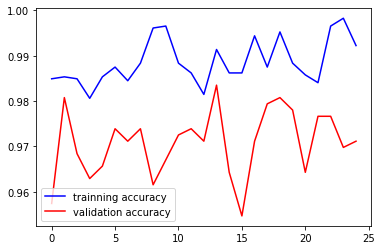

In [72]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

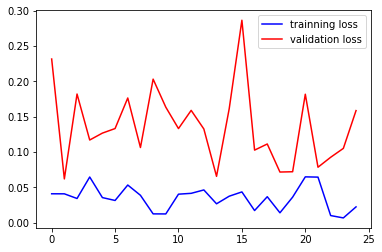

In [73]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [76]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
class_names=['Closed', 'Open', 'yawn', 'no_yawn']

# Get the true labels and predicted labels from the validation data
y_true = []
y_pred = []
for x, y in test_data:
    y_true.extend(np.argmax(y, axis=1))
    y_pred.extend(np.argmax(model.predict(x), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.colorbar()
plt.show()

KeyboardInterrupt: 

In [29]:
model.save("drowiness.h5")

In [30]:
model.save("drowiness.model")

# Drowsiness Main

In [ ]:
#pip install pillow

In [31]:
from keras.models import load_model
import cv2
from PIL import Image
from keras.preprocessing import image
import numpy as np

In [33]:
model = load_model('drowiness.h5')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 32)          1

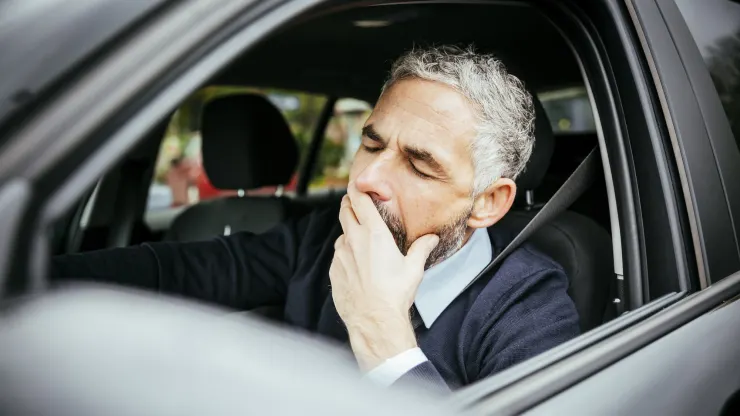

In [35]:
Image.open("/kaggle/input/drowsiness-image-sample/121.jpg")

In [36]:
image_size = (80, 80)

In [37]:
img = Image.open("/kaggle/input/drowsiness-image-sample/121.jpg").resize(image_size)

In [38]:
img = np.array(img)/255.0

In [39]:
img.shape

(80, 80, 3)

In [42]:
result = model.predict(img[np.newaxis, ...])

In [41]:
result.shape

(1, 4)

In [43]:
result

array([[4.2198098e-09, 1.0117687e-05, 7.7441109e-05, 9.9991238e-01]],
      dtype=float32)

In [44]:
predicted_label_index = np.argmax(result)

In [45]:
if (predicted_label_index==0):
    print('Closed eyes')
    
elif predicted_label_index==1:
    print('No Yawn Detected')
    
elif predicted_label_index==2:
    print('Open eyes')
    
elif predicted_label_index==3:
    print('Yawn Detected')

Yawn Detected


In [46]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')
    
elif predicted_label_index==1:
    print('No Drowsiness Detected')

Drowsiness Detected
